In [4]:
!pip install bs4 pandas requests matplotlib seaborn

In [55]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt





def get_book_details(url):
    respond = requests.get(url)
    print(f"The content type of website is {respond.headers["Content-Type"]}")
    #parse the html
    soup = BeautifulSoup(respond.text,"html.parser")
    # Extract book details (title, price, rating, stock availability).

    #find all h3 tags, h3_tags is a list of tags [<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>,...]
    h3_tags =soup.find_all("h3")
    
    #iterate h3_tags, find tag a, extract title, then save results into a list titles
    titles = [h3_tag.find("a")["title"] for h3_tag in h3_tags]
    
    #find all price tags, price_tags is a list of tags [<p class="price_color">Â£51.77</p>,...]
    price_tags = soup.find_all("p",class_="price_color")
    
    #iterate price_tags, extract the price, remove first 2, change to float, save results to a list prices
    prices = [float(price_tag.text[2::]) for price_tag in price_tags]
    
    #find all rating
    
    #find all tag p with class star-rating. star_rating_tags return a list [<p class="star-rating Three"> ...p>,...]
    star_rating_tags = soup.find_all("p",class_="star-rating")
    
    #iterate star_rating_tags. star_rating_tag return a dict{"class":[ 'star-rating', 'Three']}. Save it to list stars_rating
    stars_rating = [star_rating_tag.attrs for star_rating_tag in star_rating_tags] # stars_rating is a list of dicts [{"class":[ 'star-rating', 'Three']},...]
      
    #extract 'Three' from stars_rating list by iterating its elements(dict). convert string to lower case. Save results to a list star
    star = [star["class"][1].lower() for star in stars_rating] # star is a list['Three','Two',...]

    #create a mapping_stars dict
    mapping_stars = {"one":1,"two":2,"three":3,"four":4,"five":5}

    #convert star list ['three','two',...] to stars list [3,2,...]
    stars = [mapping_stars[s] for s in star]
    
    # find stock avail

    #find all tag p, class instock. stock_tags return a list of tags [<p class="instock availability"><i class="icon-ok"></i>     In stock    </p>,...]
    stock_tags = soup.find_all("p",class_="instock")

    # iterate stock_tags, extract stock_tag text, remove space using strip(), save results to a list stock.
    stock = [stock_tag.text.strip() for stock_tag in stock_tags]

    #create a dict data_page to save all results for coverting to DataFrame
    data_page = {
    "Title": titles,
    "Price": prices,
    "Rating": stars,
    "Stock": stock}
    
    return data_page


def scrape_multiple_pages(num_pages): # num_pages is the number of page we want to scrap
    all_books = [] #create an empty list to store result of function get_book_detail(url)
  
    for page_num in range(1, num_pages + 1): #start from page 1 to the page we want to scrap
        # Update the URL for each page
        url = f"http://books.toscrape.com/catalogue/page-{page_num}.html"
        #get the data_page of this page(for example page 1)
        page_data = get_book_details(url)
        #save data_page to list all_books
        all_books.append(page_data)
    return all_books
    
     # elements of all_books is dicts [{'Title': ['A Light in the Attic', 'Tipping the Velvet',..], Price': [51.77, 53.74,..],...}] 
     # meaning when we create DataFrame, df will be only 5 rows(every row is a page)
     # so we need to unpack all_books list
def get_data(n):
    #scrape first n pages
    data1 = scrape_multiple_pages(n)
    #iterate data1, convert each element to DataFrame, then save to a list
    uncombined_df = [pd.DataFrame(data) for data in data1]
    #concat all DataFrame to a single DataFrame
    combined_df = pd.concat(uncombined_df, ignore_index=True)
    return combined_df
df = get_data(5)

# save as csv file
df.to_csv("data.csv",index = False)


The content type of website is text/html
The content type of website is text/html
The content type of website is text/html
The content type of website is text/html
The content type of website is text/html


First 5 rows are:
                                   Title  Price  Rating     Stock
0                   A Light in the Attic  51.77       3  In stock
1                     Tipping the Velvet  53.74       1  In stock
2                             Soumission  50.10       1  In stock
3                          Sharp Objects  47.82       4  In stock
4  Sapiens: A Brief History of Humankind  54.23       5  In stock
Overview of data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   100 non-null    object 
 1   Price   100 non-null    float64
 2   Rating  100 non-null    int64  
 3   Stock   100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB
None
Missing value in each column:
Title       0
Price(£)    0
Rating      0
Stock       0
dtype: int64
dupicate row are:
0
Average book price is: 34.560700000000004


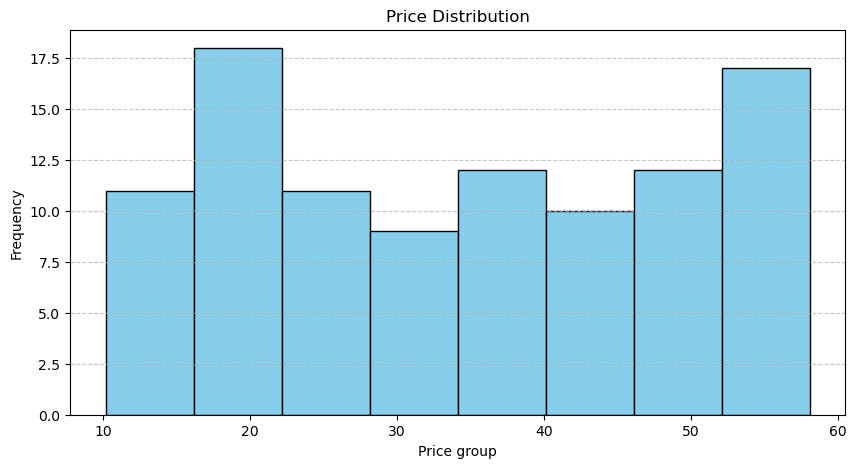

Price range: [10.16    16.15375 22.1475  28.14125 34.135   40.12875 46.1225  52.11625
 58.11   ]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#load csv file
df = pd.read_csv("data.csv")
#first 5 rows
print("First 5 rows are:")
print(df.head())
print("Overview of data set:")
print(df.info())

#change the price column to Price(pounds)
df.rename(columns = {"Price":"Price(£)"}, inplace=True)

#clean data

#count missing data in each column
print("Missing value in each column:")
print(df.isnull().sum())

#count duplicate row
print("dupicate row are:")
print(df.duplicated().sum())

# Exploratory Data Analysis (EDA)

#What is the average book price?
print(f"Average book price is: {df["Price(£)"].mean()}") 

#Are books mostly expensive or cheap?

#Plot a histogram of prices
df_price = df["Price(£)"].copy() # extract price column from DataFrame
hist, bin_edges = np.histogram(df_price, bins='auto')
plt.figure(figsize = (10,5))
plt.hist(df_price,bins = bin_edges, color="skyblue", edgecolor="black")
# Label and title
plt.title("Price Distribution")
plt.xlabel("Price group")
plt.ylabel("Frequency")

# show plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
# show price range for reference
print(f"Price range: {bin_edges}")


               








In [75]:
import pandas as pd
a = {"A": [1, 2], "B": [3, 4]}

df = pd.DataFrame(a,index=["S1", "S2"])
df["A"] = df["A"]*2
df.loc["S1"]



A    2
B    3
Name: S1, dtype: int64

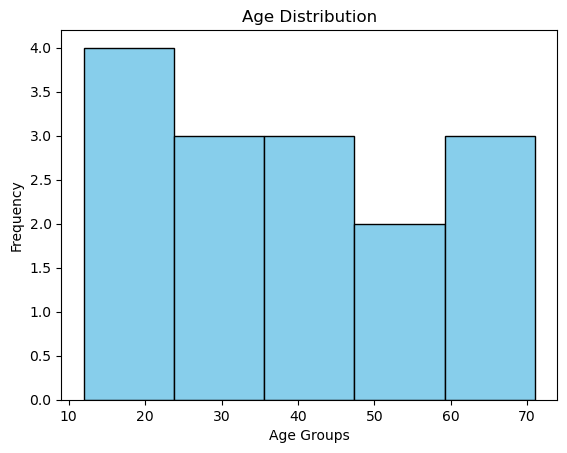

Bin edges: [12.  23.8 35.6 47.4 59.2 71. ]


In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Ages
ages = [15, 22, 37, 45, 68, 53, 12, 29, 16, 71, 34, 50, 62, 28, 42]

# Automatically determine the best bin size
hist, bin_edges = np.histogram(ages, bins='auto')

# Plot the histogram
plt.hist(ages, bins=bin_edges, color="skyblue", edgecolor="black")
plt.title('Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

# Print the bin edges for reference
print("Bin edges:", bin_edges)